In [1]:
import numpy as np
import scipy.stats as stat
import re
import os
import sys
sys.path.insert(0, 'D:/software/')
from Biomol import HDF5_trast as t5
from Biomol import StyleTools as st
from Biomol import StyleToolsRaw as stw
from Biomol import ImageLab as iml

import h5py
import pandas as pd
from pandas import DataFrame

import pytiff
from PIL import Image
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.colors as clrs

%load_ext autoreload
%autoreload 2


    
  


In [21]:
# Structure of the TRAST file
directory=r'D:/new trast test data/TRAST curve/'
filename = 'Sodium Ascorbate mM.hdf5'
file = directory + filename
with h5py.File(file,'r') as f:
    for key in f.keys():
        print(key)
        for i in np.array(f[key]):
            print(i)


            

014_1mM-Sodium_Ascorbate-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
015_POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
017_0.50mM-Sodium_Ascorbate-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
018_0.75mM-Sodium_Ascorbate-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
019_2mM-Sodium_Ascorbate-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp


In [76]:

# plot different shells or some more than one hdf5 files
directory=r'D:/new trast test data/TRAST curve/different shells (kisc free)/'
import pandas as pd
filelist=os.listdir(directory)
filelist=[directory+ i for i in filelist if 'hdf5' in os.path.splitext(i)[1]]  #select csv file
print(filelist)
for file in filelist:
    with h5py.File(file,'r') as f:
        for key in f.keys():
            print(file.split('/')[-1].split('.')[0])
            for i in np.array(f[key]):
                print(i)


['D:/new trast test data/TRAST curve/different shells (kisc free)/shell11.hdf5', 'D:/new trast test data/TRAST curve/different shells (kisc free)/shell22.hdf5', 'D:/new trast test data/TRAST curve/different shells (kisc free)/shell33.hdf5', 'D:/new trast test data/TRAST curve/different shells (kisc free)/shell44.hdf5']
shell11
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
shell22
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
shell33
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
shell44
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp


In [24]:

# change some of key name#
with h5py.File(file) as f:
    #f.move('007_HQ574_54M-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit',r'007_HQ574\54M-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit')
    #f.move('008_D620_40M-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit',r'008_D620\40M-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit')
    #f.move('009_ET670_50M-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit',r'009_ET670\50M-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit')
    #f.move('006_244nM-NAO-Air-PBS-PH7.4.fit','006_POPC-244nM-NAO-Air-PBS-PH7.4.fit')
    #f.move('018_20percents_POPA_POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit','018_20% POPA-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit')
    #f.move('019_20percents_DOPA_POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit','019_20% DOPA-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit')
    f.move('015_1mM-Sodium_Ascorbate-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit.fit',r'015_0mM-Sodium_Ascorbate-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit')
 

In [13]:

#delete some datasets which do not use
with h5py.File(file) as f:
    del f['020_0.5mM-H2O2-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit']
    for key in f.keys():
        print(key)
        for i in np.array(f[key]):
            print(i)


015_0mM-H2O2-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
021_1mM-H2O2-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
023_2mM-H2O2-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp
024_3mM-H2O2-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit
HDfit
HDtp
Lower Conf
TRAST
Upper Conf
excRate
fit
rates
rawData
rawTp
residual
tp


014_1mM-Sodium_Ascorbate-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit
015_0mM-Sodium_Ascorbate-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit
017_0.50mM-Sodium_Ascorbate-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit
018_0.75mM-Sodium_Ascorbate-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit
019_2mM-Sodium_Ascorbate-POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit


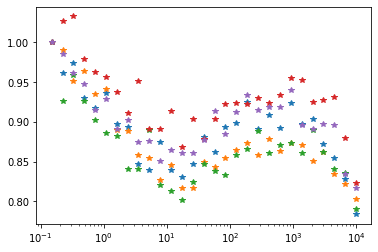

In [25]:
# draw raw data
with h5py.File(file,'r') as f:
    for key in f.keys():
        print(key)
        N= np.array(f[key]['TRAST'][:,0]) #choose first point
        arry_x=np.array(f[key]['tp'][:])
        arry_y=np.array(f[key]['TRAST']/N) # Normalize the first point
        arry_y=arry_y[0]
        plt.semilogx(arry_x,arry_y,marker='*',linestyle='none')

shell11
shell22
shell33
shell44


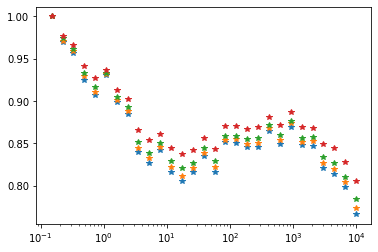

In [140]:

# plot different shells raw data
for file in filelist:
    with h5py.File(file,'r') as f:
        for key in f.keys():
            print(file.split('/')[-1].split('.')[0])
            N= np.array(f[key]['TRAST'][:,0]) #choose first point
            arry_x=np.array(f[key]['tp'][:])
            arry_y=np.array(f[key]['TRAST']/N) # Normalize the first point
            arry_y=arry_y[0]
            plt.semilogx(arry_x,arry_y,marker='*',linestyle='none')


In [5]:
#pickData(file,'tp')

In [20]:

def pickData1(filename,key,Data):
    with h5py.File(filename,'r') as f:
        return f[key][Data][:]

In [21]:
pickData1(file,'007_POPC-244nM-NAO-Air-PBS-PH7.4.fit','rates')

array([[1.59000000e+00, 4.58000000e+00, 4.00840546e-01, 1.09342494e+00,
        8.21569320e-02, 4.39663221e-02, 1.66195519e+01, 5.73009604e-01,
        1.52632943e-09, 7.00226121e-05, 9.84348705e-01, 0.00000000e+00]])

In [15]:
#pickData1(file,'012_POPC-244nM-NAO-Air-PBS-PH7.4-200mW.fit','HDfit')

In [10]:
'''
def TRASTaxes(fig, size=(6,5), ratio=0.2):
    
    # Structure

    axMain = fig.add_axes([0, ratio, 1, 1-ratio])
    axRes = fig.add_axes([0, 0, 1, ratio])
    
    # Style
    axMain.get_xaxis().set_visible(False)
    axRes.set_xscale('log')
    axMain.set_xscale('log')
    
    return fig, axMain, axRes   
'''

"\ndef TRASTaxes(fig, size=(6,5), ratio=0.2):\n    \n    # Structure\n\n    axMain = fig.add_axes([0, ratio, 1, 1-ratio])\n    axRes = fig.add_axes([0, 0, 1, ratio])\n    \n    # Style\n    axMain.get_xaxis().set_visible(False)\n    axRes.set_xscale('log')\n    axMain.set_xscale('log')\n    \n    return fig, axMain, axRes   \n"

In [14]:
'''
# Function for making box plots with all data points shown within
def dotBox(df,col='kt',by=['CoA','SP'],rot=0, ax=None, ylim = None, color=None, alpha=0.5):
    
    if not ax == None:
        df.boxplot(column=col, by=by,figsize=(15,7),rot=rot,notch=True, bootstrap=1000, showfliers=False, ax=ax)
    else:
        df.boxplot(column=col, by=by,figsize=(15,7),rot=rot,notch=True, bootstrap=1000, showfliers=False)
    
    for i,d in enumerate(df.groupby(by)):
        y = d[1][col]
        x = np.random.normal(i+1, 0.1, len(y))
        if not color == None:
            plt.plot(x, y, mec='none', ms=4, marker="o", linestyle="None",alpha=alpha, color=color[i])  
        else:
            plt.plot(x, y, mec='none', ms=4, marker="o", linestyle="None",alpha=alpha)  
        
    if not ylim == None:
        ax.set_ylim(ylim)
        
    fig = ax.get_figure()
    fig.suptitle('')
    ax.set_title('')
'''

In [15]:
'''
def significance(data1, data2):
    
    import scipy.stats as stat
    
    #s, p = stat.ttest_ind(a, b)
    #print('Welch\'s T-test:' +'statistic = '+str(s)+', p-value = '+str(p))
    s, p = stat.mannwhitneyu(data1, data2)
    
    # s = statistic
    # p = p-value
    # level = significance level (1 = 5 %, 2 = 1 %, 3 = 0.1 %)
    
    level=0
    if p <= 0.05:
        level=1
    if p <= 0.01:
        level=2
    if p <= 0.001:
        level=3
    
    return p, level
 '''

In [26]:
# Style definitions
axstyle = {'LegendSize':18,
           'LabelSize':20,
           'MajorTickWidth':1.5,
           'MajorTickLength':10,
           'MinorTickWidth':1.5,
           'MinorTickLength':5,
           'LabelFont':'Arial',
           'LegendFont':'Arial'}

inset_style = {'LegendSize':8,
               'LabelSize':8,
               'MajorTickWidth':1,
               'MajorTickLength':3,
               'MinorTickWidth':1,
               'MinorTickLength':1.5,
               'LabelFont':'Arial',
               'XLabelPad':-2,
               'YLabelPad':-3,
               'LegendFont':'Arial',
               'TickPad':1}

marker_style = {'markersize':2,
               'linestyle':'none',
               'marker':'s'}

line_style = {'linewidth':1.5}

dashed_line_style = {'linewidth':1.5,
                     'linestyle':'dashed',
                     'color':'gray'}

errorbar_style = {'markersize':4,
                  'linewidth':1.3,
                  'elinewidth':1.3,
                  'capsize':3}

legend_style = {'handlelength':2,
                'labelspacing':0.03}

TRAST_axis_label = {'xlabel':r'Pulse duration ($\mu$s)',
                    'ylabel':r'$\langle F_{exc}(w)\rangle_{norm}$'}

TRAST_axis_label_off = {'xlabel':r'Pulse duration ($\mu$s)',
                        'ylabel':r' ',
                        'rlabel':r' '}

panel_labelstyle={'fontsize':12, 'horizontalalignment':'center'}
text_labelstyle={'fontsize':12, 'horizontalalignment':'center'}

dashcolor = [0.2, 0.2, 0.2]

logminors = list(np.linspace(2, 9, 8)*0.1)+list(np.linspace(2, 9, 8))+list(np.linspace(2, 9, 8)*10)+\
            list(np.linspace(2, 9, 8)*100)+list(np.linspace(2, 9, 8)*1000)

In [33]:
#数据导入绘图后，在绘制legend的时候再改的方法，改变legend 的顺序

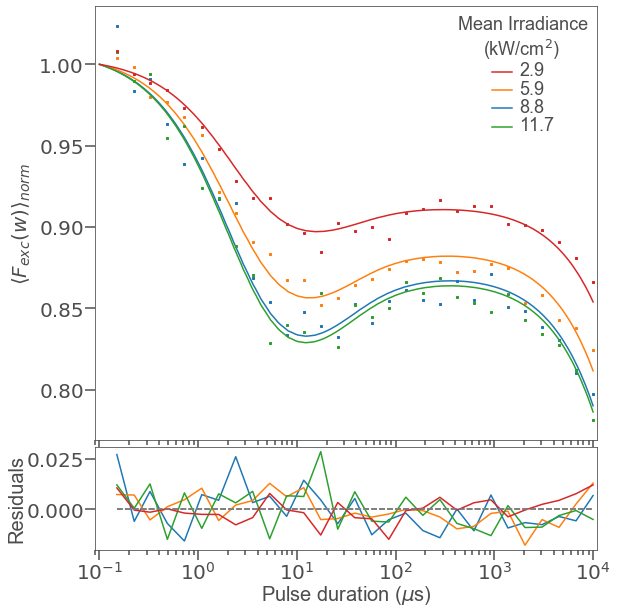

In [5]:
def plotfig_power(file):
    k01 = t5.pickDataset(file,'excRate')[:,0]*1e6 # s^-1
    excCross = 2.5262e-8*0.822*1e-8 # cm^2
    wave = 488e-9 # m
    h = 6.62607004e-34  #m^2 kg  s^-1
    c = 299792458 # m  s^-1

    irr = k01/excCross*h*c/wave*1e-3 # kW / cm^-2

    order = np.argsort(k01)


    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    with h5py.File(file,'r') as f:
        for i,k in enumerate(f.keys()):
                N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
                #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
                tp = f[k]['tp'][:]
                ind = np.argsort(tp)  #should not nessesary
                residual = f[k]['residual'][0,:]

                #Main plot
                hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
                axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label='{0:.1f}'.format(irr[i]), **line_style)


                #residual plot
                hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
                axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    
    handles,labels = axMain.get_legend_handles_labels()
    
    newhandles=[]
    newlabels=[]
    for n in order:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,handles=newhandles,labels=newlabels,title='Mean Irradiance\n     (kW/cm$^2$)', ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory+ filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

plotfig_power(file)
    
    
    
    
 


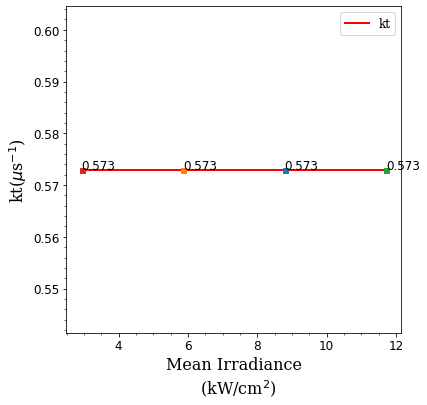

In [14]:
#plot different power parameter trend

import matplotlib.font_manager as font_manager
def power_inset(file,para,tag):
    
    k01 = t5.pickDataset(file,'excRate')[:,0]*1e6 # s^-1
    excCross = 2.5262e-8*0.822*1e-8 # cm^2
    wave = 488e-9 # m
    h = 6.62607004e-34  #m^2 kg  s^-1
    c = 299792458 # m  s^-1

    irr = k01/excCross*h*c/wave*1e-3 # kW / cm^-2
    
    ind = np.argsort(k01)
    
    tag_sort = []
    
    para_sort = []
    
    irr_sort = []
    
    paralist, [taglist], err = t5.pickRate(file, para, tags=[tag], conf=True)
    
    for n in ind:
        tag_sort.append(taglist[n])
        para_sort.append(paralist[n])
        irr_sort.append(irr[n])
    
    font = font_manager.FontProperties(family='serif', weight='normal', style='normal', size=12)

    fig = plt.figure(figsize=(6,6))
   
    
    for i in range(paralist.shape[0]):
       
        hPlot = plt.errorbar(irr[i], paralist[i], yerr=err[i,0], linestyle = 'none', marker='s', markersize=5)
        
        plt.text(irr[i], paralist[i], round(paralist[i],4), fontsize=12)
    
    plt.plot(irr_sort, para_sort,'r-',linewidth=2.0, label= para)   
    
    
    #plt.title('different pH',fontsize=14, family='serif')
    plt.gca().set_xlabel('Mean Irradiance\n  (kW/cm$^2$)', fontsize=16, family='serif')
    plt.gca().set_ylabel(para +r'($\mu$s$^{-1}$)', fontsize=16, family='serif')
    
    plt.tick_params(axis='x',labelsize=12)
    
    plt.tick_params(axis='y', labelsize=12)
    plt.minorticks_on()

    plt.gca().legend(prop=font,loc='best')

    
    plt.savefig(directory +  filename.split('.')[0] + '_'+ tag + '_'+ para + '_' + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    
    plt.show()
    
power_inset(file,'kt','Laser_power_mW')



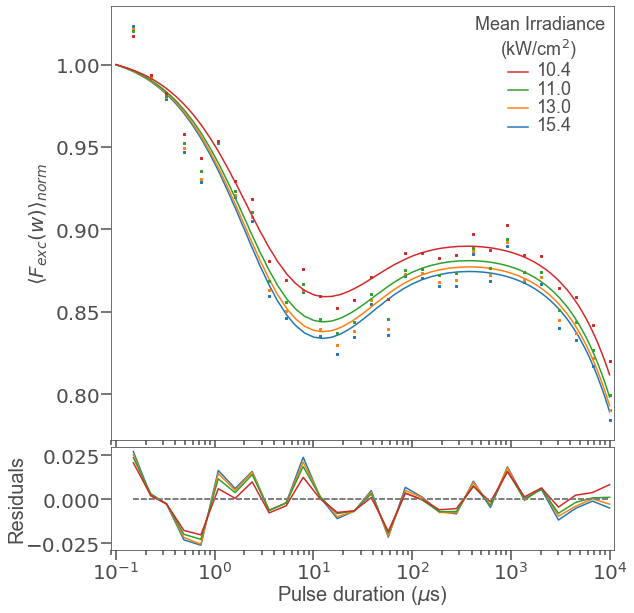

In [142]:
#plot different shells data
def plotfig_power_shells(filelist):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    
    irr_list = [] 
    
    for file in filelist:
        
        
        
        k01 = t5.pickDataset(file,'excRate')[:,0][0]*1e6 # s^-1
        
        
        excCross = 2.5262e-8*0.822*1e-8 # cm^2
        wave = 488e-9 # m
        h = 6.62607004e-34  #m^2 kg  s^-1
        c = 299792458 # m  s^-1

        irr = k01/excCross*h*c/wave*1e-3 # kW / cm^-2
        
        irr_list.append(irr)

    order = np.argsort(irr_list)
      

    for i, file in enumerate(filelist):
        with h5py.File(file,'r') as f:
            for k in f.keys():
                N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
                #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
                tp = f[k]['tp'][:]
                ind = np.argsort(tp)  #should not nessesary
                residual = f[k]['residual'][0,:]

                #Main plot
                hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
                axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label='{0:.1f}'.format(irr_list[i]), **line_style)


                #residual plot
                hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
                axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)

    handles,labels = axMain.get_legend_handles_labels()
    
    newhandles=[]
    newlabels=[]
    for n in order:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,handles=newhandles,labels=newlabels,title='Mean Irradiance\n     (kW/cm$^2$)', ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory+ 'different shells'+ '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

plotfig_power_shells(filelist)
    
    
    
    
 


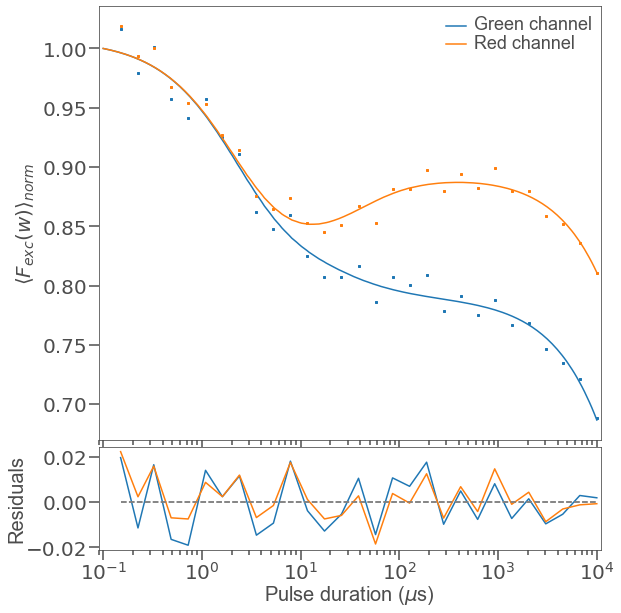

In [130]:
#plot different shells data
def plotfig_morefiles(filelist):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
       
      
    for i, file in enumerate(filelist):
        with h5py.File(file,'r') as f:
            for k in f.keys():
                N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
                #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
                tp = f[k]['tp'][:]
                ind = np.argsort(tp)  #should not nessesary
                residual = f[k]['residual'][0,:]

                #Main plot
                hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
                axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label=file.split('/')[-1].split('.')[0], **line_style)


                #residual plot
                hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
                axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)

        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False, ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory+ 'different channels'+ '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

plotfig_morefiles(filelist)
    
    
    

[<matplotlib.lines.Line2D object at 0x000001A883CCDEF0>, <matplotlib.lines.Line2D object at 0x000001A883CCD080>, <matplotlib.lines.Line2D object at 0x000001A883C57320>, <matplotlib.lines.Line2D object at 0x000001A8FF6A0E80>, <matplotlib.lines.Line2D object at 0x000001A883BBC630>, <matplotlib.lines.Line2D object at 0x000001A8FF790B70>, <matplotlib.lines.Line2D object at 0x000001A8FF851748>]
['pH 10', 'pH 7.4', 'pH 3', 'pH 9', 'pH 5', 'pH 11', 'pH 12']


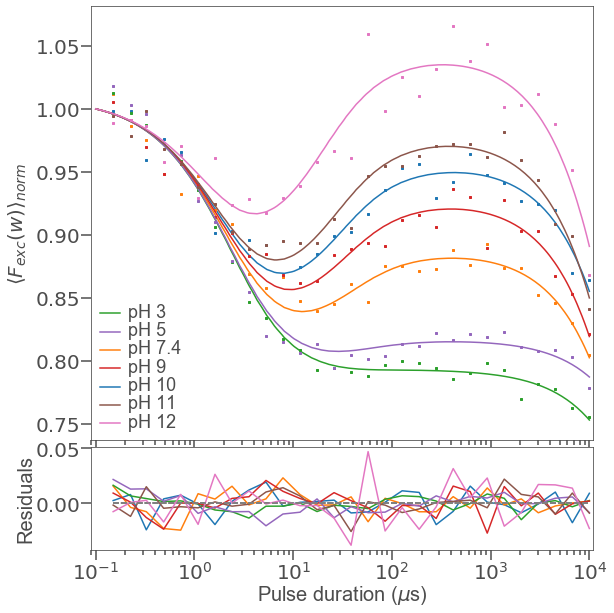

In [64]:
#pure differnet pH

def plotfig_ph(file):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]
            ind = np.argsort(tp)  #should not nessesary
            residual = f[k]['residual'][0,:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
            axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label='pH '+ k.split('.f')[0].split('H')[1], **line_style)


            #residual plot
            hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
            axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    
    handles,labels = axMain.get_legend_handles_labels()
    label_sort=[]
    print(handles)
    print(labels)
    for i in labels:
        label_sort.append(float(i.split(' ')[1]))
        
    ind=np.argsort(label_sort)
    
    newhandles=[]
    newlabels=[]
    for n in ind:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,handles=newhandles,labels=newlabels, ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory + filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

plotfig_ph(file)

[<matplotlib.lines.Line2D object at 0x000001CA6E73D8D0>, <matplotlib.lines.Line2D object at 0x000001CA6E73D710>, <matplotlib.lines.Line2D object at 0x000001CA6E73D908>, <matplotlib.lines.Line2D object at 0x000001CA6E7CAA90>, <matplotlib.lines.Line2D object at 0x000001CA6E7EE9B0>, <matplotlib.lines.Line2D object at 0x000001CA6E7DB8D0>, <matplotlib.lines.Line2D object at 0x000001CA6E7E17F0>]
['pH 10', 'pH 7.4', 'pH 3', 'pH 9', 'pH 5', 'pH 11', 'pH 12']


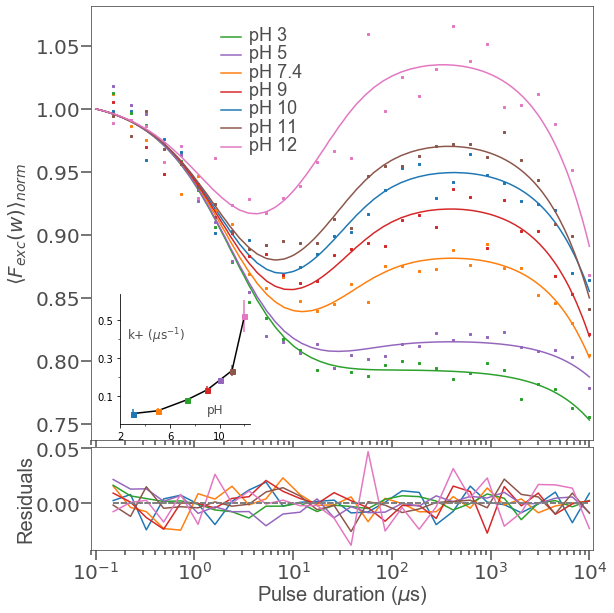

In [6]:
#plot with insert figure
def plotfig_ph(file,axMain, axRes):
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]
            ind = np.argsort(tp)  #should not nessesary
            residual = f[k]['residual'][0,:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
            axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label='pH '+ k.split('.f')[0].split('H')[1], **line_style)


            #residual plot
            hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
            axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    
    handles,labels = axMain.get_legend_handles_labels()
    label_sort=[]
    print(handles)
    print(labels)
    for i in labels:
        label_sort.append(float(i.split(' ')[1]))
        
    ind=np.argsort(label_sort)
    
    newhandles=[]
    newlabels=[]
    for n in ind:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    #axMain.set_title('TRAST Curves')
    
    axMain.legend(loc=[0.25,0.65],frameon=False,handles=newhandles,labels=newlabels, ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 

#Inset: fitted k+ rates for pH series
def pH_inset(file,ax):
    
    kp, [pH], err = t5.pickRate(file, 'k+', tags=['pH'], conf=True)
    
    pH_sort = []
    
    kp_sort = []
    ind=np.argsort(pH)
    
    for n in ind:
        pH_sort.append(pH[n])
        kp_sort.append(kp[n])
    
    


    for i in range(kp.shape[0]):
        hPlot = ax.errorbar(pH[i], kp[i], yerr=err[i,0], linestyle = 'none', marker='s', markersize=5)
    
    ax.plot(pH_sort, kp_sort,'k')
    
    ax.spines['right'].set_color('none')     # 去掉右边的边框线
    ax.spines['top'].set_color('none')       # 去掉上边的边框线
    #ax.set_ylabel(r'k+ ($\mu$s$^{-1}$)')
    ax.text(2.5, 0.4, r'k+ ($\mu$s$^{-1}$)', color=[0.3, 0.3, 0.3], size=12)
    ax.text(9, 0.01, 'pH', color=[0.3, 0.3, 0.3], size=12)
    #ax.set_xlabel('pH')
    ax.patch.set_alpha(0)

    #st.styleAxes(ax, inset_style)
    
    ax.set_xticks([2, 6, 10])
    ax.set_xticks([4, 8,12], minor=True)
    ax.set_yticks([0.1, 0.3, 0.5])
    ax.set_yticks([0.2, 0.4], minor=True)
    
#PLOT the figure
fig = plt.figure(figsize=(9,10))
gs = gridspec.GridSpec(5,4,hspace=0.07)
axMain=plt.subplot(gs[:-1,:])
axRes=plt.subplot(gs[-1,:])

# pH series
#axRes = fig.add_axes([0.1, 0.1, 0.98, 0.25])
#axMain = fig.add_axes([0.1, 0.35, 0.98, 0.8])

plotfig_ph(file,axMain, axRes)

# Inset: kp rate
ax = fig.add_axes([0.17,0.3,0.2,0.18])
pH_inset(file,ax)


plt.savefig(directory + filename.split('.')[0] + 'insert'+ '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
plt.show()

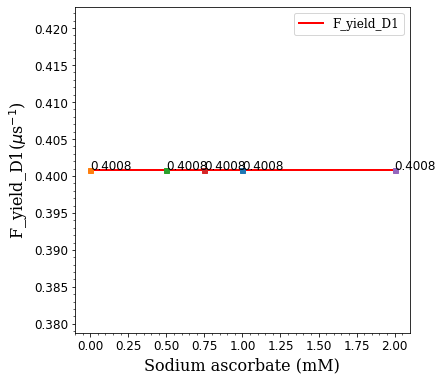

In [36]:
#plot different parameter trend

import matplotlib.font_manager as font_manager
def para_inset(file,para,tag):
    
    font = font_manager.FontProperties(family='serif', weight='normal', style='normal', size=12)

    fig = plt.figure(figsize=(6,6))
   
    
    paralist, [taglist], err = t5.pickRate(file, para, tags=[tag], conf=True)
    
    tag_sort = []
    
    para_sort = []
    
    ind=np.argsort(taglist)
    
    for n in ind:
        tag_sort.append(taglist[n])
        para_sort.append(paralist[n])
    
    


    for i in range(paralist.shape[0]):
        hPlot = plt.errorbar(taglist[i], paralist[i], yerr=err[i,0], linestyle = 'none', marker='s', markersize=5)
        
        plt.text(taglist[i], paralist[i], round(paralist[i],4), fontsize=12)
    
    plt.plot(tag_sort, para_sort,'r-',linewidth=2.0, label= para)   
    
    
    #plt.title('different pH',fontsize=14, family='serif')
    plt.gca().set_xlabel('Sodium ascorbate (mM)', fontsize=16, family='serif')
    plt.gca().set_ylabel(para +r'($\mu$s$^{-1}$)', fontsize=16, family='serif')
    
    plt.tick_params(axis='x',labelsize=12)
    
    plt.tick_params(axis='y', labelsize=12)
    plt.minorticks_on()

    plt.gca().legend(prop=font,loc='best')

    
    plt.savefig(directory +  filename.split('.')[0] + '_'+ tag + '_'+ para + '_' + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    
    plt.show()
    
para_inset(file,'F_yield_D1','Sodium_Ascorbate_mM')



[<matplotlib.lines.Line2D object at 0x000001A883BEB518>, <matplotlib.lines.Line2D object at 0x000001A883BEB6D8>, <matplotlib.lines.Line2D object at 0x000001A883BEB2B0>, <matplotlib.lines.Line2D object at 0x000001A8FF937AC8>, <matplotlib.lines.Line2D object at 0x000001A8FF76B278>]
['0 $μ$M', '20 $μ$M', '30 $μ$M', '50 $μ$M', '100 $μ$M']


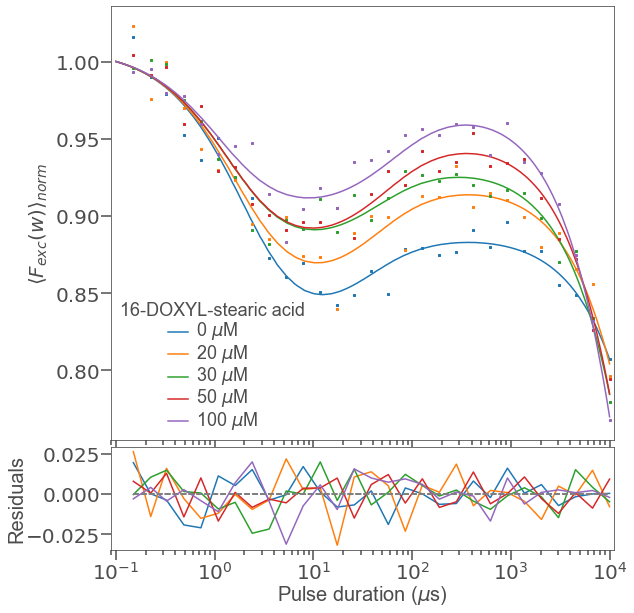

In [73]:
def plotfig_doxyl(file):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]
            ind = np.argsort(tp)  #should not nessesary
            residual = f[k]['residual'][0,:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
            axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label=k.split('_')[1].split('u')[0] + ' $\u03BC$M', 
                            **line_style)


            #residual plot
            hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
            axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    
    handles,labels = axMain.get_legend_handles_labels()
    label_sort = []
    print(handles)
    print(labels)
    for i in labels:
        label_sort.append(float(i.split(' ')[0]))
        
    ind=np.argsort(label_sort)
    
    newhandles=[]
    newlabels=[]
    for n in ind:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,title = '16-DOXYL-stearic acid', handles=newhandles,labels=newlabels, ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory + filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

plotfig_doxyl(file)

[<matplotlib.lines.Line2D object at 0x000001A881773710>, <matplotlib.lines.Line2D object at 0x000001A881773F98>, <matplotlib.lines.Line2D object at 0x000001A881773C50>]
['0 % Tempo-POPC', '4 % Tempo-POPC', '1 % Tempo-POPC']


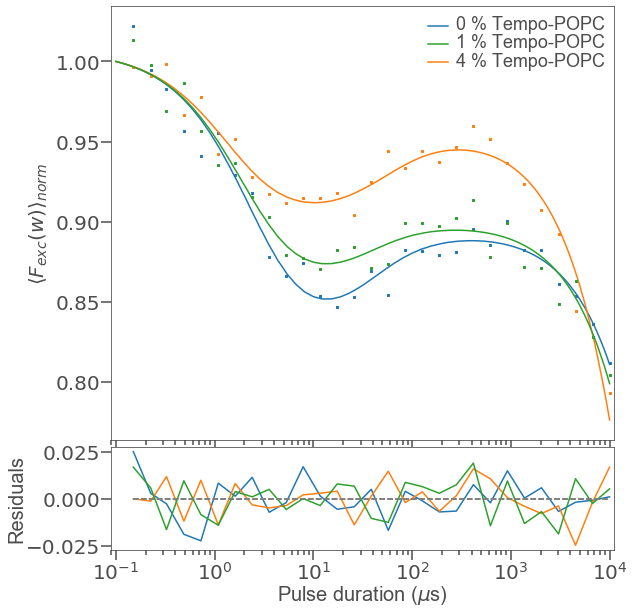

In [91]:
def plotfig_tempo(file):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]
            ind = np.argsort(tp)  #should not nessesary
            residual = f[k]['residual'][0,:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
            axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label=k.split('-')[0].split('_')[1][0] + r' % Tempo-POPC', 
                            **line_style)


            #residual plot
            hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
            axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    
    handles,labels = axMain.get_legend_handles_labels()
    label_sort = []
    print(handles)
    print(labels)
    for i in labels:
        label_sort.append(float(i.split(' ')[0]))
        
    ind=np.argsort(label_sort)
    
    newhandles=[]
    newlabels=[]
    for n in ind:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False, handles=newhandles,labels=newlabels, ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory + filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

plotfig_tempo(file)

[<matplotlib.lines.Line2D object at 0x000002387D145A58>, <matplotlib.lines.Line2D object at 0x000002387D140F60>, <matplotlib.lines.Line2D object at 0x000002387D145748>, <matplotlib.lines.Line2D object at 0x000002387D1AAB38>]
['0 mM', '1 mM', '2 mM', '3 mM']


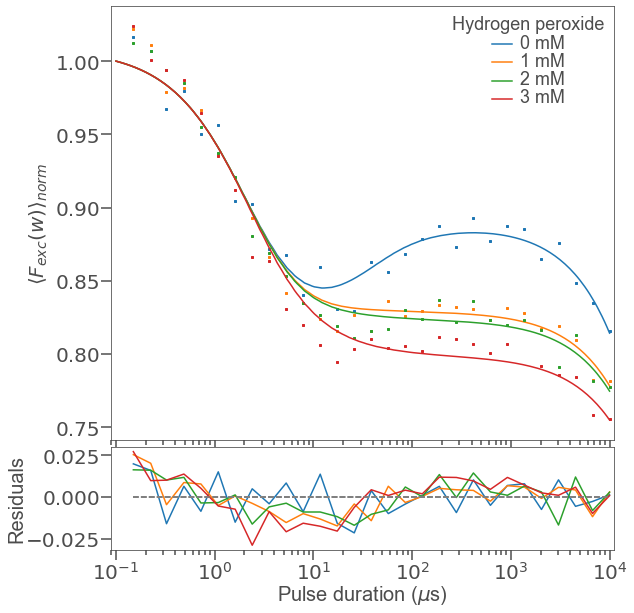

In [14]:
def plotfig_H2O2(file):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]
            ind = np.argsort(tp)  #should not nessesary
            residual = f[k]['residual'][0,:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
            axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label=k.split('_')[1].split('mM')[0] + ' mM', 
                            **line_style)


            #residual plot
            hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
            axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    
    handles,labels = axMain.get_legend_handles_labels()
    label_sort = []
    print(handles)
    print(labels)
    for i in labels:
        label_sort.append(float(i.split(' ')[0]))
        
    ind=np.argsort(label_sort)
    
    newhandles=[]
    newlabels=[]
    for n in ind:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,title = 'Hydrogen peroxide', handles=newhandles,labels=newlabels, ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory + filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    
    

plotfig_H2O2(file)

[<matplotlib.lines.Line2D object at 0x000002387CEC3CF8>, <matplotlib.lines.Line2D object at 0x000002387CEC3B38>, <matplotlib.lines.Line2D object at 0x000002387CEC3D30>, <matplotlib.lines.Line2D object at 0x000002387F20CEB8>, <matplotlib.lines.Line2D object at 0x000002387F21ADD8>]
['1 mM', '0 mM', '0.50 mM', '0.75 mM', '2 mM']


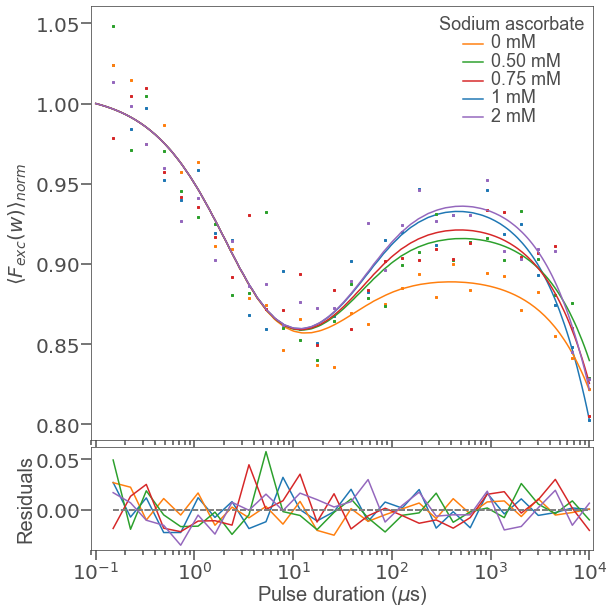

In [27]:
def plotfig_Ascorbate(file):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]
            ind = np.argsort(tp)  #should not nessesary
            residual = f[k]['residual'][0,:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
            axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label=k.split('_')[1].split('mM')[0] + ' mM', 
                            **line_style)


            #residual plot
            hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
            axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    
    handles,labels = axMain.get_legend_handles_labels()
    label_sort = []
    print(handles)
    print(labels)
    for i in labels:
        label_sort.append(float(i.split(' ')[0]))
        
    ind=np.argsort(label_sort)
    
    newhandles=[]
    newlabels=[]
    for n in ind:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,title = 'Sodium ascorbate', handles=newhandles,labels=newlabels, ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory + filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

plotfig_Ascorbate(file)

[<matplotlib.lines.Line2D object at 0x000001A8FF81E438>, <matplotlib.lines.Line2D object at 0x000001A8FF81EA58>, <matplotlib.lines.Line2D object at 0x000001A8FF81EC18>, <matplotlib.lines.Line2D object at 0x000001A8FF8D27F0>, <matplotlib.lines.Line2D object at 0x000001A883B3F358>, <matplotlib.lines.Line2D object at 0x000001A8FF441C18>]
['0 mM', '200 mM', '350 mM', '50 mM', '100 mM', '500 mM']


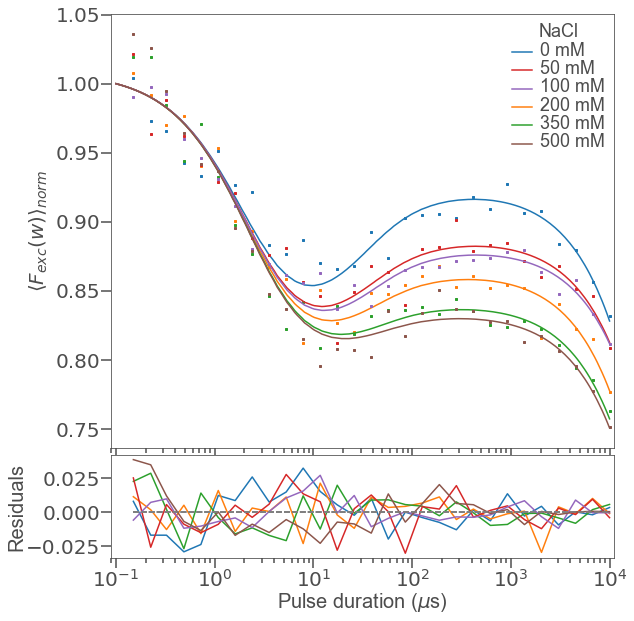

In [125]:
def plotfig_NaCl(file):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]
            ind = np.argsort(tp)  #should not nessesary
            residual = f[k]['residual'][0,:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
            axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label=k.split('_')[1].split('mM')[0] + ' mM', 
                            **line_style)


            #residual plot
            hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
            axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    
    handles,labels = axMain.get_legend_handles_labels()
    label_sort = []
    print(handles)
    print(labels)
    for i in labels:
        label_sort.append(float(i.split(' ')[0]))
        
    ind=np.argsort(label_sort)
    
    newhandles=[]
    newlabels=[]
    for n in ind:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,title = 'NaCl', handles=newhandles,labels=newlabels, ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory + filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

plotfig_NaCl(file)

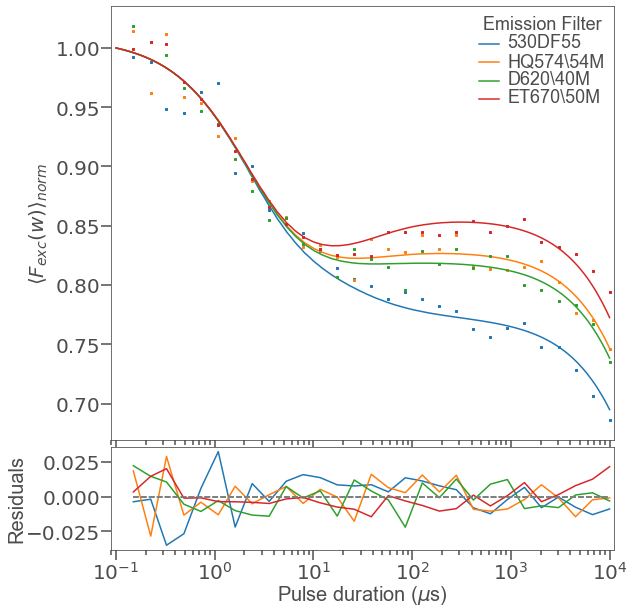

In [101]:
def plotfig_filters(file):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]
            ind = np.argsort(tp)  #should not nessesary
            residual = f[k]['residual'][0,:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
            axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label=k.split('-POPC')[0].split('_')[1], 
                            **line_style)


            #residual plot
            hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
            axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    '''
    handles,labels = axMain.get_legend_handles_labels()
    label_sort = []
    print(handles)
    print(labels)
    for i in labels:
        label_sort.append(float(i.split(' ')[0]))
        
    ind=np.argsort(label_sort)
    
    newhandles=[]
    newlabels=[]
    for n in ind:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
     '''   
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,title = 'Emission Filter', ncol=1, **legend_style) #DEL handles=newhandles,labels=newlabels,

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory + filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

plotfig_filters(file)

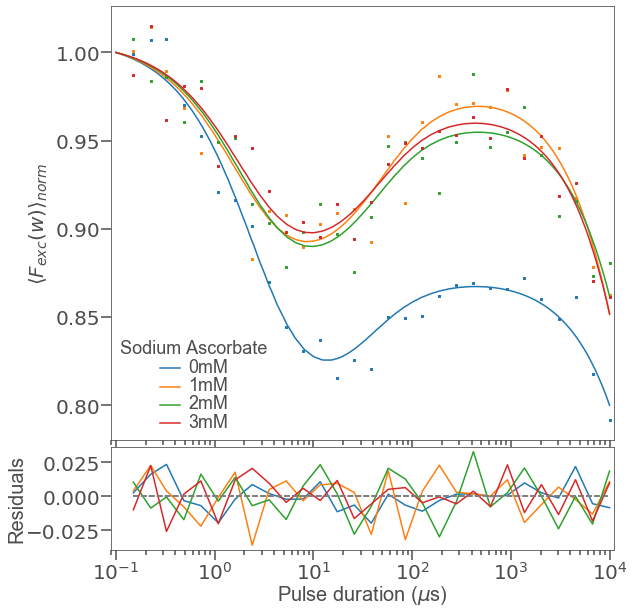

In [7]:
def plotfig_composition(file):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]
            ind = np.argsort(tp)  #should not nessesary
            residual = f[k]['residual'][0,:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
            axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label=k.split('-Sodium')[0].split('_')[1], 
                            **line_style)

            #residual plot
            hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
            axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    '''
    handles,labels = axMain.get_legend_handles_labels()
    label_sort = []
    print(handles)
    print(labels)
    for i in labels:
        label_sort.append(float(i.split(' ')[0]))
        
    ind=np.argsort(label_sort)
    
    newhandles=[]
    newlabels=[]
    for n in ind:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
     '''   
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False, title= 'Sodium Ascorbate',ncol=1, **legend_style) #DEL handles=newhandles,labels=newlabels,

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory + filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    
    

plotfig_composition(file)

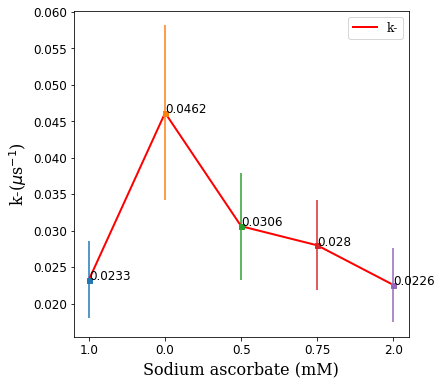

In [31]:
#plot different compositions

import matplotlib.font_manager as font_manager
def composition_inset(file,para,tag):
    
    font = font_manager.FontProperties(family='serif', weight='normal', style='normal', size=12)

    fig = plt.figure(figsize=(6,6))
   
    
    paralist, [taglist], err = t5.pickRate(file, para, tags=[tag], conf=True)
     
    scale_ls = range(paralist.shape[0])
    
    for i in range(paralist.shape[0]):
        
        hPlot = plt.errorbar(scale_ls[i], paralist[i], yerr=err[i,0], linestyle = 'none', marker='s', markersize=5)
        
        plt.text(scale_ls[i], paralist[i], round(paralist[i],4), fontsize=12)
    
    plt.plot(scale_ls, paralist,'r',linewidth=2.0, label= para)
    plt.xticks(scale_ls,taglist)
    
    
    #plt.title('different pH',fontsize=14, family='serif')
    plt.gca().set_xlabel('Sodium ascorbate (mM)', fontsize=16, family='serif')
    plt.gca().set_ylabel(para +r'($\mu$s$^{-1}$)', fontsize=16, family='serif')
    
    plt.tick_params(axis='x',labelsize=12)
    
    plt.tick_params(axis='y', labelsize=12)
    #plt.minorticks_on()

    plt.gca().legend(prop=font,loc='best')

    
    plt.savefig(directory +  filename.split('.')[0] + '_'+ tag + '_'+ para + '_' + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    
    plt.show()
    
composition_inset(file,'k-','Sodium_Ascorbate_mM')





[<matplotlib.lines.Line2D object at 0x000001A8FF751B70>, <matplotlib.lines.Line2D object at 0x000001A8FF751588>, <matplotlib.lines.Line2D object at 0x000001A8FF751B00>, <matplotlib.lines.Line2D object at 0x000001A8FF90C198>, <matplotlib.lines.Line2D object at 0x000001A8FF6EDB70>, <matplotlib.lines.Line2D object at 0x000001A883C47748>]
['1 mM', '25 mM', '100 mM', '200 mM', '350 mM', '500 mM']


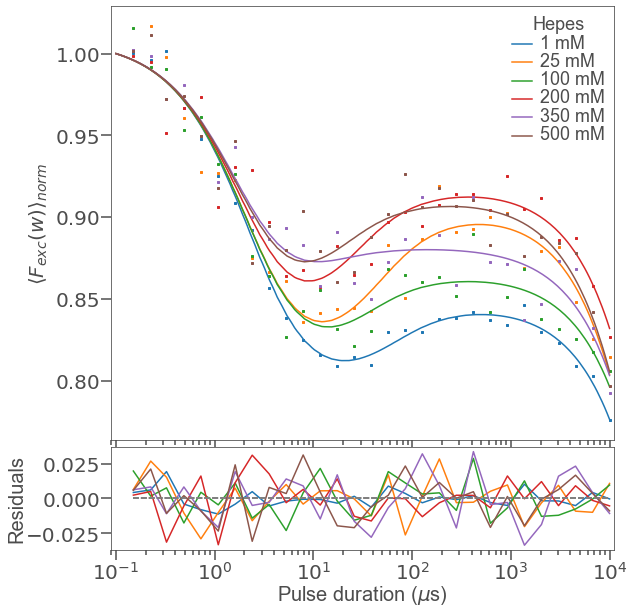

In [112]:
def plotfig_hepes(file):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    axRes=plt.subplot(gs[-1,:])
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N = f[k]['HDfit'][:,0]  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]
            ind = np.argsort(tp)  #should not nessesary
            residual = f[k]['residual'][0,:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, **marker_style)
            axMain.semilogx(f[k]['HDtp'],f[k]['HDfit'][0,:]/N, color=hPlot[0].get_color(),label=k.split('_')[1].split('mM')[0] + ' mM', 
                            **line_style)


            #residual plot
            hPlot = axRes.semilogx(tp[ind],residual[ind], color=hPlot[0].get_color(),**line_style)
            axRes.semilogx(np.array([tp[0], tp[-1]]), np.array([0, 0]), **dashed_line_style)
    
    handles,labels = axMain.get_legend_handles_labels()
    label_sort = []
    print(handles)
    print(labels)
    for i in labels:
        label_sort.append(float(i.split(' ')[0]))
        
    ind=np.argsort(label_sort)
    
    newhandles=[]
    newlabels=[]
    for n in ind:
        newhandles.append(handles[n])
        newlabels.append(labels[n])
        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,title = 'Hepes', handles=newhandles,labels=newlabels, ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    axMain.tick_params(labelbottom=False)
    
    axRes.set_xticks([0.1, 1, 10, 100, 1000,10000])


    axRes.set_xlim((0.09, 11000))
    
    st.TRASTstyle(axMain, axRes, axstyle, **TRAST_axis_label) 
    
    
    plt.savefig(directory + filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

plotfig_hepes(file)

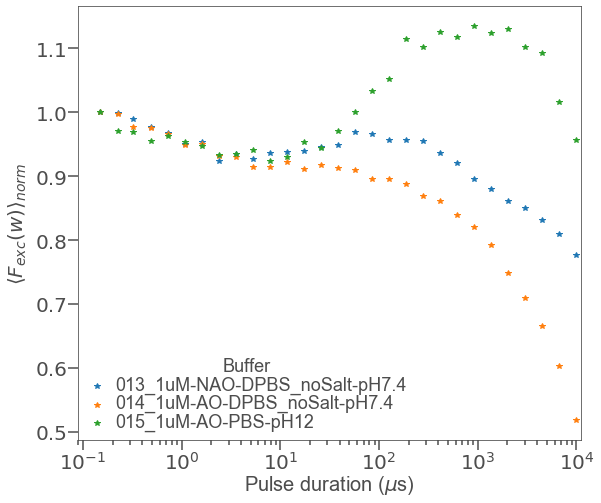

In [13]:
def plotfig_rawdata(file):
    
    plt.figure(figsize=(9,10))
    gs = gridspec.GridSpec(5,4,hspace=0.07)
    axMain=plt.subplot(gs[:-1,:])
    
    with h5py.File(file,'r') as f:
        for k in f.keys():
            N= np.array(f[k]['TRAST'][:,0])  # choose the first fitting point to normalize
            #M= np.max(f[k]['HDfit'][0,:])  #choose the max fitting point to normalize
            tp = f[k]['tp'][:]

            #Main plot
            hPlot = axMain.semilogx(f[k]['tp'],f[k]['TRAST'][0,:]/N, marker='*',linestyle='none',label=k.split('-Air')[0])
            
        
    #axMain.set_title('TRAST Curves')
    axMain.legend(loc='best',frameon=False,title = 'Buffer', ncol=1, **legend_style) 

    axMain.set_xlim((0.09, 11000))
    #axMain.tick_params(labelbottom=False)
    
    axMain.set_xticks([0.1, 1, 10, 100, 1000,10000])

    
    
    
    stw.TRASTstyle(axMain,axstyle, **TRAST_axis_label) 
    
    # Apply basic styling
    
    
    plt.savefig(directory + filename.split('.')[0] + '.tiff',dpi=300,bbox_inches='tight') #bbox_inches='tight' 让图片保存显示完整
    plt.show()
    
    

plotfig_rawdata(file)

In [79]:
'''
#one way to save the data to another folder and rename it ,去除原始数据
import os
 
# 图片路径
path = directory

# 目标文件夹路径

path1 = r'D:/new trast test data/TRAST fitting result/'+ filename.split('.')[0]

os.makedirs(path1)

filelist=os.listdir(path)


j=0
 
for i in filelist:
    # 判断该路径下的文件是否为图片
    if i.endswith('.tiff'):
        # 打开图片
        
        src=os.path.join(os.path.abspath(path),i)
        # 重命名
        dst = os.path.join(os.path.abspath(path1),i)
        # 执行操作
    
        os.rename(src,dst)
        j+=1
'''


In [37]:
#another way to save the data to another folder and rename it 
import os  
import shutil 
 
path = directory

directory1 = r'D:/new trast test data/TRAST fitting result/'+ filename.split('.')[0]

folder = os.path.exists(directory1)
 
if not folder:                   #判断是否存在文件夹如果不存在则创建为文件夹
    os.makedirs(directory1)           #makedirs 创建文件时如果路径不存在会创建这个路径
    print('new folder')
else:
    print("---  There is this folder!  ---")


 
for root, dirs, files in os.walk(path):
    for i in range(len(files)):
        #print(files[i])
        if filename.split('.')[0] in files[i]:
        #if (files[i][-4:] == 'tiff') or (files[i][-3:] == 'png') or (files[i][-3:] == 'JPG'):
            file_path = root+'/'+files[i]  
            new_file_path = directory1 + '/'+ files[i]  
            shutil.copy(file_path,new_file_path)  


new folder
